In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
player_ids = pd.read_csv('../files/SFBB Player ID Map - PLAYERIDMAP.csv')
player_ids = player_ids[['MLBNAME', 'MLBID']].copy()
display([(i, player_ids[i].dtype) for i in player_ids.columns])
player_ids = player_ids.dropna(subset=['MLBID']).copy()
player_ids['MLBID'] = player_ids['MLBID'].astype('int64')
display([(i, player_ids[i].dtype) for i in player_ids.columns])
batter_names = player_ids.drop_duplicates(subset='MLBID').set_index('MLBID')['MLBNAME']

[('MLBNAME', dtype('O')), ('MLBID', dtype('float64'))]

[('MLBNAME', dtype('O')), ('MLBID', dtype('int64'))]

In [3]:
savant_2024 = pd.read_csv('../files/2024/savantdata-2024.csv')

In [4]:
savant_2024['batter_name'] = savant_2024['batter'].map(batter_names)
print("Missing names:", savant_2024['batter_name'].isna().sum())
print("Total rows:", len(savant_2024))

Missing names: 5057
Total rows: 721611


In [5]:
display(savant_2024.shape)
display(savant_2024.head())

(721611, 119)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,X,6.0,ground_ball,2,2,2024,-0.96,0.99,0.67,3.00,NaN,642201.0,NaN,2,9,Bot,112.78,146.97,NaN,NaN,NaN,NaN,9.893410,-141.548522,-1.857108,-15.148286,30.423852,-18.544662,3.43,1.54,5.0,87.6,-30.0,99.9,2196.0,7.6,747139,682626,624413,657193,578428,596019,607043,621438,516782,52.91,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,5,4-Seam Fastball,7,8,7,8,8,7,7,8,Standard,Strategic,232.0,-0.142,-0.248,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,6.149605,12.090516,22.160400,45.805662,22.048373,Travis d'Arnaud
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,1,2,2024,0.20,0.61,0.75,1.20,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.952856,-131.970548,-5.159843,1.012613,25.103830,-24.224355,3.47,1.52,NaN,NaN,NaN,92.9,2209.0,7.3,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,201.0,0.000,0.037,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,NaN,NaN,NaN,NaN,NaN,Travis d'Arnaud
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,S,NaN,NaN,1,1,2024,0.12,0.35,0.66,1.61,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.757602,-132.670539,-3.857177,0.114032,25.108326,-27.443443,3.43,1.54,NaN,NaN,NaN,93.5,2302.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,3,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,210.0,0.000,-0.060,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,23.541699,-27.093819,34.778701,45.227965,45.368412,Travis d'Arnaud
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,0,1,2024,0.21,0.63,0.61,1.18,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.385514,-132.826939,-5.397765,1.181254,26.329685,-23.817729,3.47,1.54,NaN,NaN,NaN,93.5,2227.0,7.4,747139,682626,624413,657193,578428,596019,60

In [6]:
display(savant_2024.columns[savant_2024.isna().sum() / len(savant_2024) >= 0.9])
old_system_cols = ['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire']

savant_2024 = savant_2024.drop(columns = old_system_cols).copy()
savant_2024 = savant_2024.dropna(axis=0, subset=['pitch_type', 'zone']).copy()

Index(['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'on_3b', 'tfs_deprecated',
       'tfs_zulu_deprecated', 'umpire', 'sv_id'],
      dtype='object')

In [7]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter'].map(batter_names).astype('object')
savant_2024['batter_name']

0          Travis d'Arnaud
1          Travis d'Arnaud
2          Travis d'Arnaud
3          Travis d'Arnaud
4          Travis d'Arnaud
                ...       
721606       Brenton Doyle
721607      Ezequiel Tovar
721608      Ezequiel Tovar
721609      Ezequiel Tovar
721610    Charlie Blackmon
Name: batter_name, Length: 721327, dtype: object

In [8]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter_name'].fillna('Unknown Batter')

In [9]:
batter_cols = ["batter", "batter_name", "game_date", "pitch_type", "player_name", "batter", "stand", "p_throws", 
               "release_speed", "pfx_x", "pfx_z", "plate_x", "plate_z", 
               "attack_angle", "launch_angle", "launch_speed", "bat_speed", "swing_path_tilt", 
               "attack_direction", "intercept_ball_minus_batter_pos_x_inches", "intercept_ball_minus_batter_pos_y_inches", 
               "events", "description", "zone", "hit_location", "bb_type", "balls", "strikes", "outs_when_up", 
               "hc_x", "hc_y", "sz_top", "sz_bot", "hit_distance_sc", 
               "estimated_ba_using_speedangle", "estimated_woba_using_speedangle", "woba_value", "woba_denom", "babip_value", "iso_value",
               "launch_speed_angle", "at_bat_number", "delta_run_exp", "swing_length", "estimated_slg_using_speedangle", "age_bat", 
               "if_fielding_alignment", "of_fielding_alignment",
               "n_thruorder_pitcher"
               ]

batter_data = savant_2024[batter_cols].copy()

In [10]:
mask = ((batter_data["balls"] == 0) & (batter_data["strikes"] == 0))
filtered = batter_data[mask]
qualified = filtered.groupby("batter_name").count()
qualified = qualified[qualified["pitch_type"] >= (502)]
qualified_batters = qualified.index.to_list()
qualified_df = batter_data[batter_data["batter_name"].isin(qualified_batters)].reset_index(drop=True).copy()
qualified_df = qualified_df[qualified_df['batter_name'] != 'Unknown Batter'].copy()

In [11]:
foul_plays = ['foul', 'foul_bunt', 'foul_tip', 'bunt_foul_tip']
contact_plays = foul_plays + ['hit_into_play']
qualified_df.loc[:, "is_foul"] = (qualified_df["description"].isin(foul_plays)).astype(int)
qualified_df.loc[:, "is_contact"] = (qualified_df["description"].isin(foul_plays + ['hit_into_play'])).astype(int)
qualified_df.loc[:, "is_whiff"] = (qualified_df["description"].isin(["swinging_strike_blocked", "swinging_strike"])).astype(int)
qualified_df.loc[:, "is_two_str_take"] = ((qualified_df["description"].isin(["ball", "pitchout", "blocked_ball"]) & (qualified_df["strikes"] == 2))).astype(int)
qualified_df.loc[:, "is_single"] = (qualified_df["events"] == "single").astype(int)
qualified_df.loc[:, "is_double"] = (qualified_df["events"] == "double").astype(int)
qualified_df.loc[:, "is_triple"] = (qualified_df["events"] == "triple").astype(int)
qualified_df.loc[:, "is_hr"] = (qualified_df["events"] == "home_run").astype(int)
qualified_df.loc[:, "is_bb"] = (qualified_df["events"] == "walk").astype(int)
qualified_df.loc[:, "is_hbp"] = (qualified_df["events"] == "hit_by_pitch").astype(int)
qualified_df.loc[:, "is_sf"] = (qualified_df["events"].isin(["sac_fly", "sac_fly_double_play"])).astype(int)
qualified_df.loc[:, "is_sacbunt"] = (qualified_df["events"] == "sac_bunt").astype(int)
qualified_df.loc[:, "is_catch_inf"] = (qualified_df["events"] == "catcher_interf").astype(int)
qualified_df.loc[:, "is_truncated"] = (qualified_df["events"] == "truncated_pa").astype(int)
qualified_df.loc[:, 'PA_id'] = (qualified_df['game_date'].astype(str) + '_' + qualified_df['at_bat_number'].astype(str))
qualified_df.loc[:, 'name_with_stand'] = qualified_df["batter_name"] + qualified_df["stand"]
qualified_df.loc[:, 'dir_sign'] = qualified_df['stand'].map({'R': 1, 'L': -1})
qualified_df.loc[:, 'attack_direction'] = qualified_df['attack_direction'] * qualified_df['dir_sign']
qualified_df.loc[:, 'is_swing'] = (qualified_df['description'].isin(['hit_into_play', 'swinging_strike', 'foul', 'swinging_strike_blocked', 'foul_bunt', 'foul_tip', 'bunt_foul_tip', 'missed_bunt'])).astype(int)

In [12]:
def player_ABs(df: pd.DataFrame) -> pd.DataFrame:
    excluded_stats_list = ['is_bb', 'is_sf', 'is_sacbunt', 'is_hbp', 'is_catch_inf', 'is_truncated']

    df = df.copy()
    unique_pas = df.drop_duplicates(subset=['name_with_stand', 'PA_id'])
    pa_counts = (unique_pas.groupby('name_with_stand').size().reset_index(name = 'PAs'))

    atbats_excluded = df.groupby(['name_with_stand'])[excluded_stats_list].sum().reset_index().copy()

    counting_atbats = pa_counts.merge(atbats_excluded, on = 'name_with_stand', how = 'left').copy()
    counting_atbats[excluded_stats_list] = counting_atbats[excluded_stats_list].fillna(0)

    counting_atbats.loc[:, 'ABs'] = counting_atbats['PAs'] - (counting_atbats[excluded_stats_list].sum(axis=1))

    pitch_counts = df.groupby('name_with_stand')['release_speed'].size().reset_index().copy()
    pitch_counts.loc[:, 'pitch_count'] = pitch_counts["release_speed"]
    pitch_counts = pitch_counts.drop(columns=["release_speed"]).copy()

    pitches_per_PA = counting_atbats.merge(pitch_counts, on = 'name_with_stand', how = 'inner').copy()
    pitches_per_PA.loc[:, 'pitches_per_PA'] = pitches_per_PA['pitch_count'] / pitches_per_PA['PAs']
    pitches_per_PA = pitches_per_PA.sort_values(by = 'pitches_per_PA', ascending = False).reset_index(drop=True)

    return pitches_per_PA

In [13]:
qualified_df['events'].unique()

array(['field_out', 'home_run', 'strikeout', nan, 'walk', 'sac_fly',
       'single', 'grounded_into_double_play', 'double', 'hit_by_pitch',
       'triple', 'force_out', 'catcher_interf', 'truncated_pa',
       'fielders_choice_out', 'fielders_choice', 'field_error',
       'double_play', 'sac_bunt', 'strikeout_double_play',
       'sac_fly_double_play', 'triple_play'], dtype=object)

In [14]:
qualified_df['description'].unique()

array(['hit_into_play', 'swinging_strike', 'ball', 'foul',
       'called_strike', 'blocked_ball', 'swinging_strike_blocked',
       'hit_by_pitch', 'foul_bunt', 'foul_tip', 'pitchout',
       'bunt_foul_tip', 'missed_bunt'], dtype=object)

In [15]:
def wOBA(singles, doubles, triples, HRs, BBs, HBPs, SFs, ABs) -> float:
    weights = {"wBB": 0.689,
               "wHBP": 0.720,
               "w1B": 0.882,
               "w2B": 1.254,
               "w3B": 1.590,
               "wHR": 2.050
               }
    
    woba_numerator = (weights["wBB"]*BBs + weights["wHBP"]*HBPs + weights["w1B"]*singles + weights["w2B"]*doubles + weights["w3B"]*triples + weights["wHR"]*HRs)
    woba_denominator = (ABs + BBs + SFs + HBPs)
    return (woba_numerator/woba_denominator)

In [16]:
zero_strike_counts = qualified_df[(qualified_df["strikes"]==0) & (qualified_df["events"].notna())].reset_index(drop=True)

In [17]:
two_strike_counts = qualified_df[qualified_df["strikes"] == 2]

In [18]:
def merge_for_woba(df: pd.DataFrame) -> pd.DataFrame:
    hits_list = ["is_single", "is_double", "is_triple", "is_hr"]

    ABs = player_ABs(df).copy()
    player_stats = df.groupby('name_with_stand')[hits_list].sum().reset_index().copy()
    woba_stats = player_stats.merge(ABs, on='name_with_stand', how='inner').copy()
    woba_stats = woba_stats.drop(columns=['PAs', 'is_sacbunt', 'is_catch_inf', 'is_truncated', 'pitch_count', 'pitches_per_PA'])
    woba_stats.loc[:, 'wOBA'] = woba_stats.apply(lambda x: wOBA(x['is_single'], x['is_double'], x['is_triple'], x['is_hr'], x['is_bb'], x['is_hbp'], x['is_sf'], x['ABs']), axis=1)
    woba_stats = woba_stats.sort_values(by='wOBA', ascending=False)
    return woba_stats

In [19]:
two_K_woba = merge_for_woba(two_strike_counts)

In [20]:
zero_K_woba = merge_for_woba(zero_strike_counts)

In [21]:
# (1) First merge as you already have:
with_percentile = (
    zero_K_woba[['name_with_stand', 'wOBA']]
    .merge(two_K_woba[['name_with_stand', 'wOBA']],
           on='name_with_stand',
           how='inner',
           suffixes=('_x', '_y'))
)

# (2) Compute percentile of wOBA_x via rank(pct=True) * 100:
with_percentile['Z_st_percentile'] = (
    with_percentile['wOBA_x']
    .rank(method='average', pct=True)  # gives [0..1]
    * 100                               # convert to [0..100]
)
with_percentile['T_st_percentile'] = (
    with_percentile['wOBA_y']
    .rank(method='average', pct=True)  # gives [0..1]
    * 100                               # convert to [0..100]
)

with_percentile

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Aaron JudgeR,0.639233,0.341721,100.000000,98.648649
1,Brent RookerR,0.613700,0.238808,99.324324,39.189189
2,Shohei OhtaniL,0.610684,0.286257,98.648649,87.837838
3,Marcell OzunaR,0.586281,0.281080,97.972973,84.459459
4,Juan SotoL,0.583559,0.317239,97.297297,95.945946
...,...,...,...,...,...
143,Christopher MorelR,0.314678,0.232733,3.378378,31.081081
144,Sal FrelickL,0.300206,0.258983,2.702703,59.459459
145,Josh BellR,0.289333,0.237110,2.027027,36.486486
146,Dansby SwansonR,0.276672,0.250271,1.351351,50.675676


In [22]:
def player_rates(df: pd.DataFrame):
    df = df.copy()
    df = df[['name_with_stand', 'is_whiff', 'is_swing', 'is_foul', 'is_contact', 'is_two_str_take']].copy()
    df = df.groupby('name_with_stand').sum()
    return df.reset_index()

In [23]:
player_rates(two_strike_counts)

,name_with_stand,is_whiff,is_swing,is_foul,is_contact,is_two_str_take
0,Aaron JudgeR,134,484,202,350,403
1,Adley RutschmanL,54,366,157,312,178
2,Adley RutschmanR,18,146,65,128,65
3,Adolis GarciaR,146,485,180,339,275
4,Alec BohmR,49,338,144,289,194
...,...,...,...,...,...,...
143,Yainer DiazR,92,421,174,329,189
144,Yandy DiazR,56,411,176,355,233
145,Yordan AlvarezL,65,366,143,301,189
146,Zach NetoR,109,434,166,325,207


In [24]:
player_rates(zero_strike_counts)

,name_with_stand,is_whiff,is_swing,is_foul,is_contact,is_two_str_take
0,Aaron JudgeR,0,137,0,137,0
1,Adley RutschmanL,0,57,0,57,0
2,Adley RutschmanR,0,27,0,27,0
3,Adolis GarciaR,0,113,0,113,0
4,Alec BohmR,0,178,0,178,0
...,...,...,...,...,...,...
143,Yainer DiazR,0,177,0,177,0
144,Yandy DiazR,0,117,0,117,0
145,Yordan AlvarezL,0,149,0,149,0
146,Zach NetoR,0,118,0,118,0


In [23]:
by_zero = with_percentile.sort_values(by='wOBA_y', ascending=False).reset_index(drop= True)
by_zero.sort_values(by='wOBA_y', ascending=False)

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Jose RamirezL,0.346132,0.365698,8.783784,100.000000
1,Jose RamirezR,0.507059,0.352734,86.486486,99.324324
2,Aaron JudgeR,0.639233,0.341721,100.000000,98.648649
3,Ketel MarteL,0.426093,0.337322,54.729730,97.972973
4,Vladimir Guerrero Jr.R,0.479533,0.324244,79.054054,97.297297
...,...,...,...,...,...
143,Jesus SanchezL,0.460099,0.192535,67.567568,3.378378
144,Zack GelofR,0.420495,0.188871,50.000000,2.702703
145,Andrew VaughnR,0.498007,0.187697,85.135135,2.027027
146,Bryan De La CruzR,0.446701,0.179526,62.837838,1.351351


In [45]:
zero_strike_angles = zero_strike_counts.groupby('name_with_stand')[['attack_angle', 'attack_direction','swing_path_tilt']].mean().reset_index()

In [46]:
two_strike_angles = two_strike_counts.groupby('name_with_stand')[['attack_angle', 'attack_direction','swing_path_tilt']].mean().reset_index()

In [47]:
two_strike_angles

,name_with_stand,attack_angle,attack_direction,swing_path_tilt
0,Aaron JudgeR,13.253680,-3.569578,39.213226
1,Adley RutschmanL,10.903163,0.373206,35.602785
2,Adley RutschmanR,6.484802,-4.986513,39.383939
3,Adolis GarciaR,9.291412,0.611513,28.851781
4,Alec BohmR,3.967691,7.278852,30.065676
...,...,...,...,...
143,Yainer DiazR,10.425331,4.456266,29.679087
144,Yandy DiazR,3.778240,7.915951,24.327193
145,Yordan AlvarezL,7.737744,4.203077,35.345654
146,Zach NetoR,12.170277,-3.632310,33.483228


In [48]:
delta_angles = zero_strike_angles.merge(two_strike_angles, on = "name_with_stand", how = 'inner')
delta_angles.loc[:,"delta_attack_angle"] = delta_angles["attack_angle_x"] - delta_angles["attack_angle_y"]
delta_angles.loc[:,"delta_attack_direction"] = delta_angles["attack_direction_x"] - delta_angles["attack_direction_y"]
delta_angles.loc[:,"delta_swing_path_tilt(std)"] = delta_angles["swing_path_tilt_x"] - delta_angles["swing_path_tilt_y"]
delta_angles = delta_angles[['name_with_stand', "delta_attack_angle", "delta_attack_direction", "delta_swing_path_tilt(std)"]].copy()
delta_angles.loc[:,"mag_angles"] = delta_angles[["delta_attack_angle", "delta_attack_direction"]].apply(lambda x: x**2).sum(axis = 1).apply(lambda x : np.sqrt(x))

delta_angles.sort_values(by='mag_angles', ascending=False)

,name_with_stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
63,Jacob YoungR,-9.606131,-13.674197,6.043960,16.711116
92,Leody TaverasR,-5.420716,-10.788568,6.453938,12.073829
44,Elly De La CruzR,-5.897093,-9.483138,1.344597,11.167167
17,Brendan DonovanL,3.316530,8.521766,-0.307630,9.144389
84,Jurickson ProfarL,2.398049,8.533330,1.884055,8.863880
...,...,...,...,...,...
120,Riley GreeneL,0.417538,-0.436199,2.101440,0.603827
20,Brenton DoyleR,-0.293338,-0.498020,1.262455,0.577989
23,Bryan ReynoldsL,0.475505,0.052628,1.733811,0.478408
126,Shea LangeliersR,-0.304102,0.138921,1.332953,0.334331


In [49]:
by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner').sort_values(by='T_st_percentile', ascending= False).head(30)

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
0,Jose RamirezL,0.346132,0.365698,8.783784,100.000000,1.393982,-0.844352,0.702181,1.629759
1,Jose RamirezR,0.507059,0.352734,86.486486,99.324324,1.536221,-0.095640,0.677350,1.539196
2,Aaron JudgeR,0.639233,0.341721,100.000000,98.648649,-0.222399,0.012230,0.599011,0.222735
3,Ketel MarteL,0.426093,0.337322,54.729730,97.972973,-1.545314,0.388188,0.194690,1.593325
4,Vladimir Guerrero Jr.R,0.479533,0.324244,79.054054,97.297297,1.824636,-1.337819,-0.228218,2.262533
5,Carlos SantanaR,0.332703,0.317562,6.081081,96.621622,2.671371,-2.684580,-2.210007,3.787241
6,Juan SotoL,0.583559,0.317239,97.297297,95.945946,-0.365951,-0.758666,0.130476,0.842315
7,Jesse WinkerL,0.386717,0.311454,33.783784,95.270270,0.420189,3.072357,0.926454,3.100957
8,Steven KwanL,0.349881,0.309650,9.459459,94.594595,3.570625,2.957640,-1.516557,4.636486
9,Yordan AlvarezL,0.485647,0.309601,81.081081,93.918919,0.134831,0.882858,0.377484,0.893095


In [50]:
by_zero.describe()

,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
count,148.000000,148.000000,148.000000,148.000000
mean,0.428020,0.251102,50.337838,50.337838
std,0.071273,0.035357,28.964875,28.964875
min,0.255321,0.173484,0.675676,0.675676
25%,0.371443,0.228774,25.506757,25.506757
50%,0.420693,0.249566,50.337838,50.337838
75%,0.474731,0.272657,75.168919,75.168919
max,0.639233,0.365698,100.000000,100.000000


In [51]:
woba_angles = by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner')
woba_angles[(woba_angles["delta_attack_direction"] <= -2*1.393645 + (-0.914905)	) | (woba_angles["delta_attack_direction"] >= 2*1.393645 + (-0.914905))]

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
7,Jesse WinkerL,0.386717,0.311454,33.783784,95.270270,0.420189,3.072357,0.926454,3.100957
8,Steven KwanL,0.349881,0.309650,9.459459,94.594595,3.570625,2.957640,-1.516557,4.636486
11,Adley RutschmanR,0.508000,0.305906,87.162162,92.567568,0.003126,2.416543,-4.421519,2.416545
12,Bobby Witt Jr.R,0.544738,0.299346,93.918919,91.891892,3.380752,-6.115268,0.078788,6.987559
14,Freddie FreemanL,0.433339,0.297567,56.756757,90.540541,4.157679,4.660430,1.844093,6.245471
...,...,...,...,...,...,...,...,...,...
140,Willi CastroR,0.382840,0.196968,31.081081,5.405405,-0.601195,-3.819710,1.020580,3.866733
141,Jake MeyersR,0.406590,0.195020,41.891892,4.729730,-4.098957,-6.064670,1.455024,7.319950
143,Jesus SanchezL,0.460099,0.192535,67.567568,3.378378,4.245723,4.150209,1.953822,5.937205
144,Zack GelofR,0.420495,0.188871,50.000000,2.702703,-2.203510,4.043686,-0.372691,4.605090


In [52]:
woba_angles.describe()

,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.428020,0.251102,50.337838,50.337838,0.573900,-0.222655,0.884600,3.387555
std,0.071273,0.035357,28.964875,28.964875,2.187486,3.500764,1.358207,2.422470
min,0.255321,0.173484,0.675676,0.675676,-9.606131,-13.674197,-4.421519,0.222735
25%,0.371443,0.228774,25.506757,25.506757,-0.404322,-2.229796,0.244300,1.641971
50%,0.420693,0.249566,50.337838,50.337838,0.581424,0.042237,0.890594,2.860604
75%,0.474731,0.272657,75.168919,75.168919,2.066003,2.428729,1.548141,4.556385
max,0.639233,0.365698,100.000000,100.000000,5.371858,8.533330,6.453938,16.711116


In [53]:
by_zero.merge(delta_angles, on = "name_with_stand", how = 'inner').sort_values(by='delta_attack_angle', ascending= False).iloc[-15:]

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt(std),mag_angles
58,Brice TurangL,0.369093,0.259872,22.972973,60.810811,-1.822912,3.522658,1.655986,3.966375
121,Leody TaverasL,0.327971,0.216212,4.729730,18.243243,-1.878293,-5.491187,2.156520,5.803544
57,Cedric MullinsL,0.389339,0.261450,35.135135,61.486486,-1.952470,-2.089611,2.796140,2.859827
144,Zack GelofR,0.420495,0.188871,50.000000,2.702703,-2.203510,4.043686,-0.372691,4.605090
101,Eugenio SuarezR,0.530339,0.232966,91.891892,31.756757,-2.213663,5.347714,1.127574,5.787776
43,Ketel MarteR,0.533866,0.270057,93.243243,70.945946,-2.338901,4.174683,0.108328,4.785231
55,Josh NaylorL,0.370703,0.262262,25.000000,62.837838,-2.455135,-4.008935,2.374521,4.700984
102,Christopher MorelR,0.314678,0.232733,3.378378,31.081081,-2.482239,3.190108,2.081481,4.042066
39,Jonathan IndiaR,0.434174,0.270783,58.783784,73.648649,-2.515450,3.933312,0.504169,4.668879
141,Jake MeyersR,0.406590,0.195020,41.891892,4.729730,-4.098957,-6.064670,1.455024,7.319950


In [54]:
players_to_drop = ['Jacob YoungR', 'Elly De La CruzR', 'Leody TaverasR', 'Jurickson ProfarL', 'Jake MeyersR']
woba_angles = woba_angles[~woba_angles['name_with_stand'].isin(players_to_drop)].copy()

In [55]:
def woba_angle_plot(player_name: str):
    df = woba_angles.copy()
    df[f"highlight_{player_name}"] = df["name_with_stand"] == player_name

    angles = ["delta_attack_angle", "delta_attack_direction", "delta_swing_path_tilt(std)", "mag_angles"]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  # Easier indexing

    for idx, i in enumerate(angles):
        ax = axes[idx]
        sns.scatterplot(data=df, x="wOBA_y", y=i, hue=f"highlight_{player_name}", palette={True: "red", False: "gray"}, legend=False, ax=ax)
        ax.axvline(np.mean(df["wOBA_y"]), color="black", linestyle="dashed", linewidth=1)
        ax.axhline(np.mean(df[i]), color="black", linestyle="dashed", linewidth=1)
        ax.set_title(f"{player_name} {i}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

• bobby witt
• rafael devers
• luis arraez
• brendan donovan
• seiya suzuki
• steven kwan
• adeley rutschman (S)
• carlos santana (S)
• francisco lindor (S)
• jurickson profar
• jesse winker
• joey ortiz
• ketel marte
• vladdy

In [56]:
interesting_players = [
                     #   'Gunnar HendersonL',
                     #   'Bobby Witt Jr.R',
                     #   'Rafael DeversL',
                     #   'Luis ArraezL',
                     #   'Brendan DonovanL',
                       'Seiya SuzukiR',
                       'Steven KwanL',
                    #    'Adley RutschmanL',
                    #    'Adley RutschmanR',
                    #    'Carlos SantanaL',
                    #    'Carlos SantanaR',
                    #    'Francisco LindorL',
                    #    'Francisco LindorR',
                    #    'Jurickson ProfarL',
                    #    'Jurickson ProfarR',
                     #   'Jesse WinkerL',
                     #   'Joey OrtizR',
                      #  'Ketel MarteL',
                      #  'Ketel MarteR',
                     #   'Vladimir Guerrero Jr.R'
                       ]

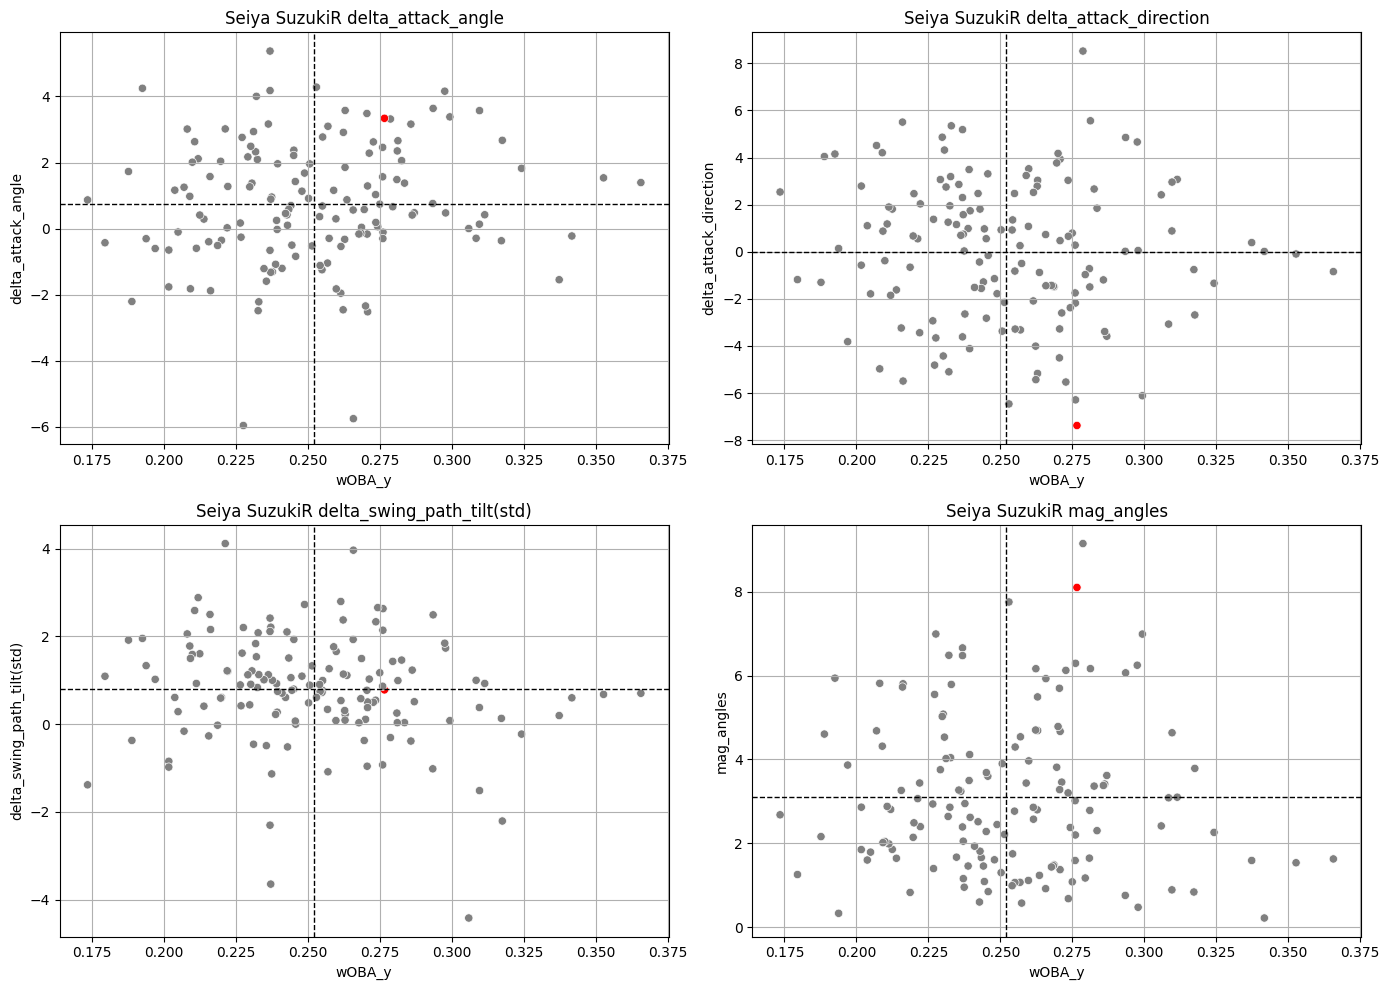

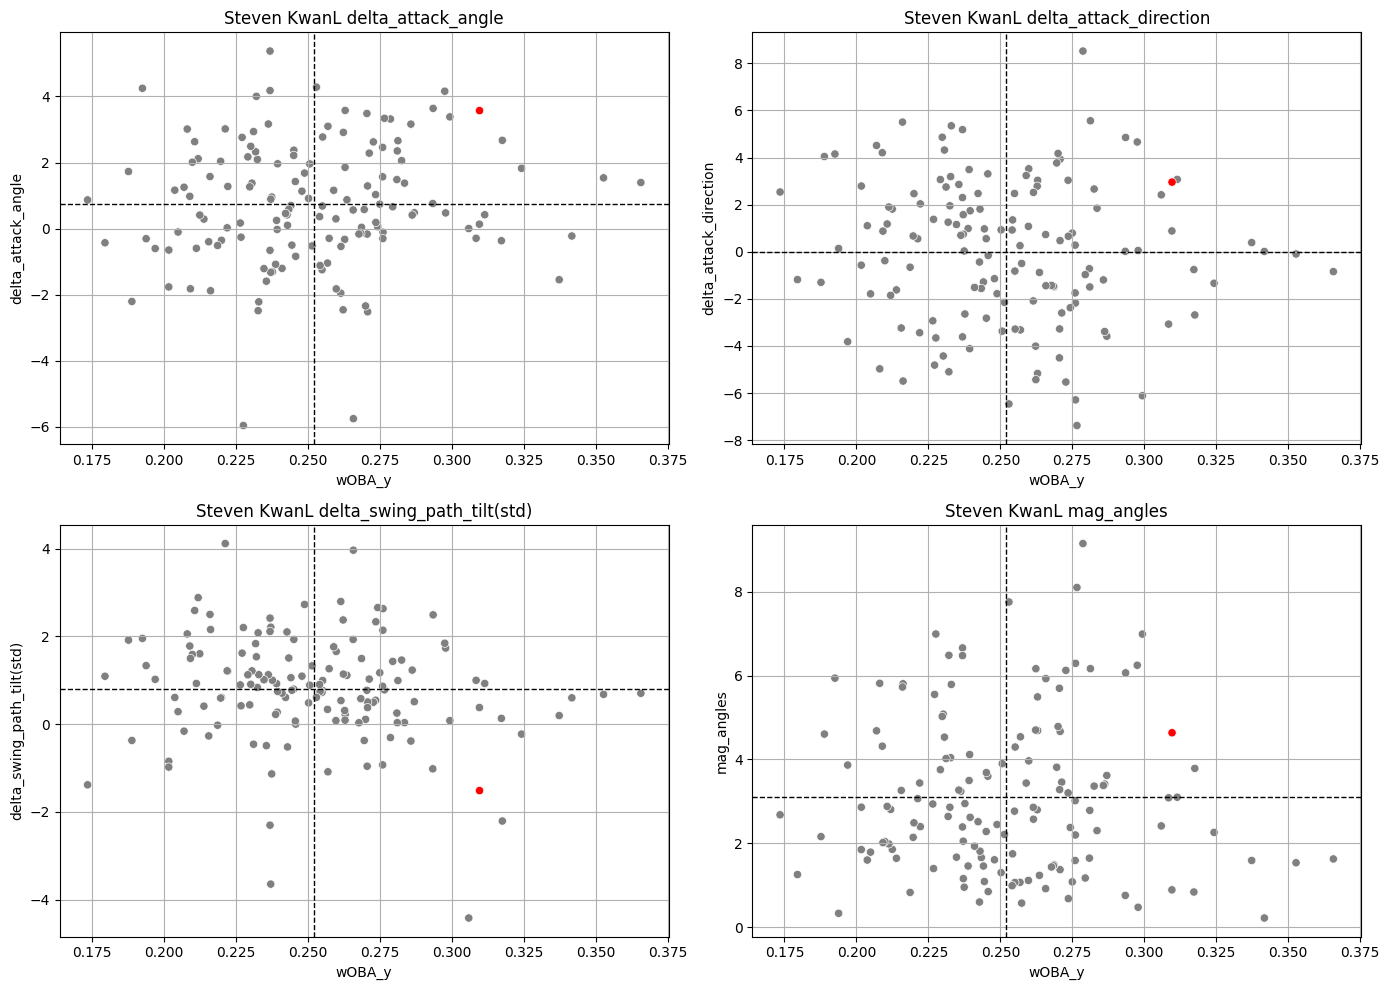

In [57]:
for i in interesting_players:
    woba_angle_plot(i)

In [ ]:
interesting_angles_zero = zero_strike_counts[['name_with_stand', 'attack_angle', 'attack_direction', 'swing_path_tilt']].copy()
interesting_angles_zero = interesting_angles_zero.groupby('name_with_stand').agg({'attack_angle': 'var', 'attack_direction': 'var','swing_path_tilt': 'var'}).reset_index()

interesting_angles_two = two_strike_counts[['name_with_stand', 'attack_angle', 'attack_direction', 'swing_path_tilt']].copy()
interesting_angles_two = interesting_angles_two.groupby('name_with_stand').agg({'attack_angle': 'var', 'attack_direction': 'var','swing_path_tilt': 'var'}).reset_index()

interesting_angles = interesting_angles_zero.merge(interesting_angles_two, on='name_with_stand', how='inner')
interesting_angles = interesting_angles.rename(columns={'attack_angle_x': 'var_attack_angle_0', 'attack_angle_y': 'var_attack_angle_2',
                                                        'attack_direction_x': 'var_attack_direction_0', 'attack_direction_y': 'var_attack_direction_2',
                                                        'swing_path_tilt_x': 'var_swing_path_tilt_0', 'swing_path_tilt_y': 'var_swing_path_tilt_2',})
interesting_angles = interesting_angles.sort_index(axis=1).copy()
interesting_angles

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2
0,Aaron JudgeR,61.844375,132.962102,99.452375,235.080209,14.876494,23.210277
1,Adley RutschmanL,67.255909,127.486126,60.123706,338.801415,39.134866,50.408205
2,Adley RutschmanR,43.009850,138.945127,71.727861,254.532122,18.174582,43.453060
3,Adolis GarciaR,51.728572,86.617203,165.022203,439.236618,31.309665,40.535761
4,Alec BohmR,44.850892,80.216256,144.905837,275.069465,26.279203,33.198635
...,...,...,...,...,...,...,...
143,Yainer DiazR,67.455187,74.211894,107.106845,292.755157,27.116206,53.338393
144,Yandy DiazR,43.423348,45.874739,165.941142,267.208443,21.068732,31.651766
145,Yordan AlvarezL,90.115842,169.675751,133.351159,248.634805,37.989327,49.691942
146,Zach NetoR,169.442840,101.026622,118.834490,368.565215,36.555765,39.434347


In [ ]:
# Create a new column for total absolute change across the 3 metrics
interesting_angles["change_attack_angle"] = (
    (interesting_angles["var_attack_angle_0"] - interesting_angles["var_attack_angle_2"]))
interesting_angles["change_attack_direction"] = (
    (interesting_angles["var_attack_direction_0"] - interesting_angles["var_attack_direction_2"]))
interesting_angles["change_swing_path_tilt"] = (
    (interesting_angles["var_swing_path_tilt_0"] - interesting_angles["var_swing_path_tilt_2"]))
# Sort by that total change, descending
interesting_angles_sorted = interesting_angles.sort_values(by="change_swing_path_tilt")

In [ ]:
by_zero

,name_with_stand,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Jose RamirezL,0.346132,0.365698,8.783784,100.000000
1,Jose RamirezR,0.507059,0.352734,86.486486,99.324324
2,Aaron JudgeR,0.639233,0.341721,100.000000,98.648649
3,Ketel MarteL,0.426093,0.337322,54.729730,97.972973
4,Vladimir Guerrero Jr.R,0.479533,0.324244,79.054054,97.297297
...,...,...,...,...,...
143,Jesus SanchezL,0.460099,0.192535,67.567568,3.378378
144,Zack GelofR,0.420495,0.188871,50.000000,2.702703
145,Andrew VaughnR,0.498007,0.187697,85.135135,2.027027
146,Bryan De La CruzR,0.446701,0.179526,62.837838,1.351351


In [ ]:
interesting_angles_sorted.merge(by_zero, on='name_with_stand', how='inner').head(30)

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2,change_attack_angle,change_attack_direction,change_swing_path_tilt,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Freddie FreemanL,86.352702,185.918136,100.175162,279.593068,21.092045,45.447513,-99.565433,-179.417906,-24.355469,0.433339,0.297567,56.756757,90.540541
1,Josh BellR,72.935533,171.727991,174.515209,460.493371,40.007602,58.460510,-98.792458,-285.978162,-18.452908,0.289333,0.237110,2.027027,36.486486
2,Nick CastellanosR,66.463983,163.064946,107.186839,287.844087,27.919233,45.094686,-96.600963,-180.657248,-17.175453,0.411144,0.206994,45.270270,10.135135
3,Oneil CruzL,69.366488,165.613184,152.320531,473.400955,30.395359,39.908091,-96.246696,-321.080424,-9.512732,0.493925,0.215577,83.108108,16.891892
4,Adley RutschmanR,43.009850,138.945127,71.727861,254.532122,18.174582,43.453060,-95.935277,-182.804261,-25.278478,0.508000,0.305906,87.162162,92.567568
5,Colton CowserL,68.055943,162.396981,65.797229,284.871307,20.702151,33.643082,-94.341038,-219.074078,-12.940930,0.495273,0.211900,83.783784,14.864865
6,Riley GreeneL,91.242937,181.163630,96.892800,229.761321,24.079142,40.189375,-89.920693,-132.868521,-16.110234,0.531748,0.242756,92.567568,43.243243
7,J.D. MartinezR,63.285959,152.201808,115.889314,285.516493,26.925433,34.160736,-88.915849,-169.627179,-7.235302,0.417563,0.250659,48.648649,51.351351
8,Marcell OzunaR,48.541614,135.497744,97.259622,319.537078,38.223381,53.070144,-86.956130,-222.277456,-14.846763,0.586281,0.281080,97.972973,84.459459
9,Brent RookerR,74.394338,157.663644,122.234949,369.968015,26.192978,40.166956,-83.269306,-247.733067,-13.973979,0.613700,0.238808,99.324324,39.189189


In [ ]:
interesting_angles_sorted.merge(by_zero, on='name_with_stand', how='inner').head(30)

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2,change_attack_angle,change_attack_direction,change_swing_path_tilt,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Brandon NimmoL,34.195937,91.318187,121.898587,455.591349,23.624311,38.408223,-57.122250,-333.692762,-14.783912,0.463907,0.231142,70.270270,28.378378
1,Gunnar HendersonL,54.342800,122.317351,119.274955,440.409575,29.348524,31.415468,-67.974551,-321.134620,-2.066944,0.439318,0.283591,60.810811,86.486486
2,Oneil CruzL,69.366488,165.613184,152.320531,473.400955,30.395359,39.908091,-96.246696,-321.080424,-9.512732,0.493925,0.215577,83.108108,16.891892
3,Josh BellL,39.590631,92.693313,178.291169,494.178078,29.407674,43.444626,-53.102682,-315.886908,-14.036952,0.424570,0.222205,52.702703,22.297297
4,Kyle SchwarberL,38.410508,58.627298,127.166687,438.934000,10.685407,19.976819,-20.216791,-311.767313,-9.291411,0.484872,0.237692,80.405405,38.513514
5,Andrew VaughnR,44.685534,106.096665,141.714638,451.385051,28.279317,48.068070,-61.411132,-309.670413,-19.788753,0.498007,0.187697,85.135135,2.027027
6,Bryan ReynoldsR,96.241450,138.466791,141.489315,445.977612,22.552488,40.050925,-42.225341,-304.488297,-17.498437,0.365000,0.211275,18.918919,14.189189
7,Pete AlonsoR,51.800082,106.499850,160.502969,454.919997,21.250609,35.535460,-54.699768,-294.417028,-14.284850,0.475723,0.270748,77.702703,72.972973
8,Cal RaleighR,51.958796,95.613421,151.771628,445.888926,19.576491,41.423278,-43.654625,-294.117299,-21.846786,0.406730,0.173484,42.567568,0.675676
9,Andrew McCutchenR,63.781827,100.250759,85.472335,376.445575,24.126998,32.565512,-36.468932,-290.973241,-8.438514,0.408621,0.239153,43.243243,39.864865


In [ ]:
interesting_angles_sorted.merge(by_zero, on='name_with_stand', how='inner').head(30)

,name_with_stand,var_attack_angle_0,var_attack_angle_2,var_attack_direction_0,var_attack_direction_2,var_swing_path_tilt_0,var_swing_path_tilt_2,change_attack_angle,change_attack_direction,change_swing_path_tilt,wOBA_x,wOBA_y,Z_st_percentile,T_st_percentile
0,Luis ArraezL,72.731312,114.208110,123.359119,185.408270,45.193177,90.053793,-41.476798,-62.049152,-44.860616,0.322434,0.281294,4.054054,85.135135
1,Francisco LindorR,59.237375,90.948007,147.264730,312.795284,13.561535,48.186317,-31.710632,-165.530554,-34.624782,0.465500,0.267753,70.945946,68.243243
2,Alex VerdugoL,79.222657,92.052624,134.885695,255.672506,25.991469,60.337228,-12.829967,-120.786810,-34.345759,0.363532,0.208994,17.567568,11.486486
3,Jesus SanchezL,66.037991,103.539414,149.456354,429.963494,28.698876,61.430423,-37.501423,-280.507140,-32.731547,0.460099,0.192535,67.567568,3.378378
4,Matt ChapmanR,29.415146,67.136485,137.745183,378.898605,33.115958,62.728978,-37.721339,-241.153422,-29.613020,0.527569,0.248862,88.513514,50.000000
5,Cody BellingerL,44.290201,86.549774,92.686675,248.968276,26.972697,56.455495,-42.259572,-156.281601,-29.482798,0.366612,0.262965,19.594595,65.540541
6,Bobby Witt Jr.R,61.397893,84.060102,135.300527,283.507102,34.558544,62.092833,-22.662210,-148.206575,-27.534289,0.544738,0.299346,93.918919,91.891892
7,Cal RaleighL,70.124729,119.982870,181.290899,381.308279,31.701536,59.219072,-49.858140,-200.017381,-27.517536,0.495366,0.204916,84.459459,9.459459
8,Jose RamirezR,27.592865,58.059794,109.431010,373.326946,37.158928,64.369616,-30.466929,-263.895937,-27.210688,0.507059,0.352734,86.486486,99.324324
9,Anthony SantanderL,44.798530,111.871548,176.609444,454.076403,46.450493,73.226891,-67.073018,-277.466958,-26.776398,0.451186,0.275993,64.189189,79.729730


In [13]:
sorted(qualified_df["game_date"].unique())

['2024-03-28',
 '2024-03-29',
 '2024-03-30',
 '2024-03-31',
 '2024-04-01',
 '2024-04-02',
 '2024-04-03',
 '2024-04-04',
 '2024-04-05',
 '2024-04-06',
 '2024-04-07',
 '2024-04-08',
 '2024-04-09',
 '2024-04-10',
 '2024-04-11',
 '2024-04-12',
 '2024-04-13',
 '2024-04-14',
 '2024-04-15',
 '2024-04-16',
 '2024-04-17',
 '2024-04-18',
 '2024-04-19',
 '2024-04-20',
 '2024-04-21',
 '2024-04-22',
 '2024-04-23',
 '2024-04-24',
 '2024-04-25',
 '2024-04-26',
 '2024-04-27',
 '2024-04-28',
 '2024-04-29',
 '2024-04-30',
 '2024-05-01',
 '2024-05-02',
 '2024-05-03',
 '2024-05-04',
 '2024-05-05',
 '2024-05-06',
 '2024-05-07',
 '2024-05-08',
 '2024-05-09',
 '2024-05-10',
 '2024-05-11',
 '2024-05-12',
 '2024-05-13',
 '2024-05-14',
 '2024-05-15',
 '2024-05-16',
 '2024-05-17',
 '2024-05-18',
 '2024-05-19',
 '2024-05-20',
 '2024-05-21',
 '2024-05-22',
 '2024-05-23',
 '2024-05-24',
 '2024-05-25',
 '2024-05-26',
 '2024-05-27',
 '2024-05-28',
 '2024-05-29',
 '2024-05-30',
 '2024-05-31',
 '2024-06-01',
 '2024-06-

In [17]:
qualified_df[qualified_df['batter_name'] == "Adolis Garcia"].shape[0]

1319

In [102]:
import pandas as pd
from typing import List, Dict

def split_by_count(
    df: pd.DataFrame,
    batter_names: List[str],
    year: int
) -> Dict[str, Dict[str, pd.DataFrame]]:
    """
    For each batter in batter_names, filter df to that batter & year,
    then produce swing/non-swing splits by count.
    
    Returns a dict:
      {
        batter_name: {
          "all":    DataFrame of all PAs,
          "swing":  DataFrame of swings only (attack_angle not NA),
          "Z_st":   swings with strikes==0,
          "ZZ_st":  swings with strikes==0 & balls==0,
          "T_st":   swings with strikes==2,
        },
        ...
      }
    """
    out = {}
    for name in batter_names:
        # all PAs for this batter & year
        all_pa = df[(df["batter_name"] == name)]
        # only swings
        non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
        swing = all_pa[~all_pa['description'].isin(non_swings)].reset_index(drop=True).copy()
        out[name] = {
            "all":   all_pa,
            "swing": swing,
            "Z_st":  swing[swing["strikes"] == 0]
                          .sort_values(by="bb_type"),
            "ZZ_st": swing[(swing["strikes"] == 0) & (swing["balls"] == 0)]
                          .sort_values(by="bb_type"),
            "T_st":  swing[swing["strikes"] == 2]
                          .sort_values(by="bb_type"),
        }
    return out

# Example usage:
batters = ['Brendan Donovan',
 'Fernando Tatis Jr.',
 'Freddie Freeman',
 'J.D. Martinez',
 'Nico Hoerner',
 'George Springer',
 'Gleyber Torres',
 'Pete Alonso',
 'J.P. Crawford',
 'Adolis Garcia']
splits = split_by_count(batter_data, batters, 2024)



In [155]:
T_st = splits["Brendan Donovan"]["T_st"]
Z_st = splits["Brendan Donovan"]["Z_st"]
ZZ_st = splits["Brendan Donovan"]["ZZ_st"]

Z_st_whiff = (Z_st['description'] == 'swinging_strike').astype(int)
Z_st_contact = 1 - (Z_st_whiff.sum() / Z_st.shape[0])
ZZ_st_whiff = (ZZ_st['description'] == 'swinging_strike').astype(int)
ZZ_st_contact = 1 - (ZZ_st_whiff.sum() / ZZ_st.shape[0])
T_st_whiff = (T_st['description'] == 'swinging_strike').astype(int)
T_st_contact = 1 - (T_st_whiff.sum() / T_st.shape[0])
Z_st_contact, ZZ_st_contact, T_st_contact, T_st.shape[0]

(np.float64(0.8916967509025271),
 np.float64(0.8854961832061069),
 np.float64(0.8943488943488943),
 407)

In [107]:
Young = batter_data[(batter_data["batter_name"] == "Jacob Young")]
Young_swing = Young[~Young["attack_angle"].isna()]
Z_st = Young_swing[Young_swing["strikes"] == 0].sort_values(by = "bb_type")
ZZ_st = Young_swing[(Young_swing["strikes"] == 0)& (Young_swing["balls"] == 0)].sort_values(by = "bb_type")
T_st = Young_swing[Young_swing["strikes"] == 2].sort_values(by = "bb_type")

In [108]:
Z_st_whiff = (Z_st['description'] == 'swinging_strike').astype(int)
Z_st_contact = 1 - (Z_st_whiff.sum() / Z_st.shape[0])
Z_st_contact


np.float64(0.9019607843137255)

In [109]:
ZZ_st_whiff = (ZZ_st['description'] == 'swinging_strike').astype(int)
ZZ_st_contact = 1 - (ZZ_st_whiff.sum() / ZZ_st.shape[0])
ZZ_st_contact

np.float64(0.8617886178861789)

In [110]:
T_st_whiff = (T_st['description'] == 'swinging_strike').astype(int)
T_st_contact = 1 - (T_st_whiff.sum() / T_st.shape[0])
T_st_contact

np.float64(0.8270440251572327)

In [125]:
list(Young["bb_type"].dropna().unique())

['ground_ball', 'line_drive', 'fly_ball', 'popup']

In [146]:
T_st["bb_type"].value_counts()

bb_type
ground_ball    71
line_drive     37
fly_ball       18
popup           3
Name: count, dtype: int64

In [152]:
Young["bb_type"].dropna().count()

np.int64(377)

In [153]:
Z_st["bb_type"].value_counts().sum()

np.int64(83)

In [154]:
ZZ_st["bb_type"].value_counts().sum()

np.int64(43)

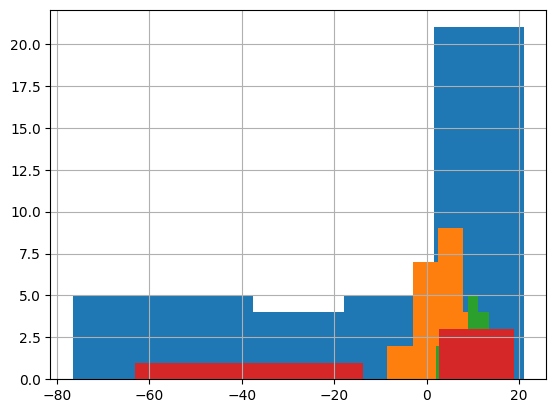

In [147]:
x =list(Young["bb_type"].dropna().unique())
for i in x:
    Z_st[Z_st["bb_type"] == i]["attack_angle"].hist(bins =5)

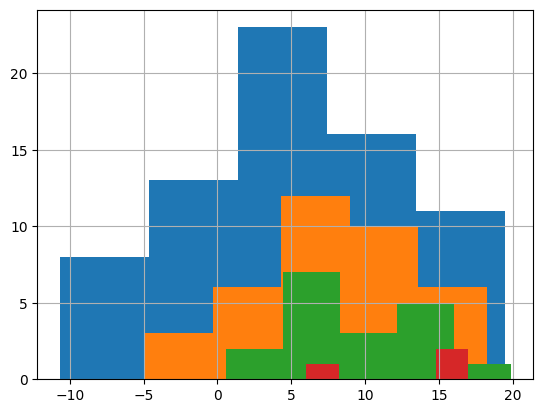

In [144]:
x =list(Young["bb_type"].dropna().unique())
for i in x:
    T_st[T_st["bb_type"] == i]["attack_angle"].hist(bins =5)

In [ ]:
for i in Young["bb_type"].dropna().unique():
    T_st[T_st[["bb_type"] == i]].hist(bins=20)
    Z_st[Z_st[["bb_type"] == i]].hist(bins=20)

<Axes: xlabel='attack_angle', ylabel='attack_direction'>

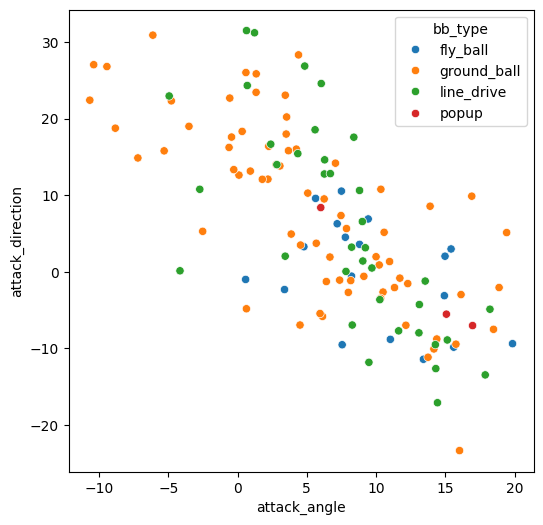

In [112]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=T_st, x='attack_angle', y="attack_direction" ,hue = "bb_type") 

In [75]:
mask = (
    (batter_data["balls"]   == 0) 
  & (batter_data["strikes"] == 0)
)
filtered = batter_data[mask]
qualified  = filtered.groupby("batter_name").count()
qualified = qualified[qualified["pitch_type"] >= (502)]
qualified_batters = qualified.index.to_list()
qualified_df = batter_data[batter_data["batter_name"].isin(qualified_batters)].reset_index(drop=True).copy()

non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
qualified_df = qualified_df[~qualified_df['description'].isin(non_swings)].reset_index(drop=True).copy()



In [76]:
qualified_df['description'].unique()

array(['hit_into_play', 'swinging_strike', 'foul',
       'swinging_strike_blocked', 'foul_bunt', 'foul_tip', 'missed_bunt',
       'bunt_foul_tip'], dtype=object)

In [77]:
qualified_df.loc[:, 'whiff'] = (qualified_df['description'] == 'swinging_strike').astype(int)
qualified_df.loc[:, 'foul'] = ((qualified_df['description'] == 'foul') |
                                           (qualified_df['description'] == 'foul_tip') | 
                                           (qualified_df['description'] == 'foul_bunt') |
                                           (qualified_df['description'] == 'bunt_foul_tip')).astype(int)
qualified_df.loc[:, 'inplay'] = (qualified_df['description'] == 'hit_into_play').astype(int)
qualified_df

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,whiff,foul,inplay
0,Matt Olson,2024-09-30,FF,"Díaz, Edwin",621566,L,R,94.2,-1.11,1.20,0.84,2.93,19.556424,58.0,76.1,77.4,36.395467,-13.249187,27.056603,30.890146,field_out,hit_into_play,12.0,6.0,popup,0,0,0,121.61,125.27,3.41,1.68,189.0,0.037,0.039,0.0,1.0,0.0,0.0,3.0,79,-0.254,7.0,0.049,30,Strategic,Standard,1,0,0,1
1,Francisco Lindor,2024-09-30,CU,"Johnson, Pierce",596019,L,R,86.4,0.84,-0.19,0.15,1.72,18.194293,35.0,107.2,80.2,40.203398,-6.316046,34.743653,35.039294,home_run,hit_into_play,8.0,NaN,fly_ball,0,0,1,157.02,36.68,3.33,1.52,413.0,0.791,1.621,2.0,1.0,0.0,3.0,6.0,76,1.436,8.1,3.146,31,Standard,Standard,1,0,0,1
2,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.7,0.04,0.39,0.55,2.52,23.407233,NaN,NaN,78.4,32.959287,-21.244835,43.777675,40.352334,strikeout,swinging_strike,6.0,2.0,NaN,3,2,2,NaN,NaN,3.51,1.73,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,73,-0.298,8.1,NaN,34,Standard,Standard,1,1,0,0
3,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.5,0.10,0.37,0.94,1.28,30.284377,NaN,NaN,79.5,38.931011,-27.619390,46.668101,56.727472,NaN,swinging_strike,14.0,NaN,NaN,2,1,2,NaN,NaN,3.51,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.062,8.5,NaN,34,Standard,Standard,1,1,0,0
4,Marcell Ozuna,2024-09-30,FF,"Díaz, Edwin",542303,R,R,96.9,-1.05,0.90,-0.18,2.89,19.668645,86.0,NaN,77.4,31.854643,-12.917086,36.197899,37.759751,NaN,foul,5.0,NaN,NaN,1,0,2,NaN,NaN,3.51,1.73,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.043,8.0,NaN,34,Standard,Standard,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,Taylor Ward,2024-08-01,FF,"Feltner, Ryan",621493,R,R,94.5,-0.71,1.34,0.30,3.02,8.019776,53.0,80.3,66.9,25.922839,0.202764,39.037801,28.541395,NaN,foul,3.0,NaN,NaN,1,0,2,NaN,NaN,3.31,1.56,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-0.051,7.1,NaN,31,Strategic,Standard,1,0,1,0
151037,Nolan Schanuel,2024-08-01,FF,"Feltner, Ryan",694384,L,R,92.6,-0.55,1.27,0.57,3.32,8.840891,-7.0,75.6,65.9,39.714925,8.987160,24.582353,29.520187,field_out,hit_into_play,3.0,3.0,ground_ball,0,0,0,158.49,160.67,3.42,1.65,21.0,0.083,0.062,0.0,1.0,0.0,0.0,2.0,4,-0.254,5.7,0.095,22,Standard,Standard,1,0,0,1
151038,Brenton Doyle,2024-08-01,CU,"Fulmer, Carson",686668,R,R,81.4,0.80,-0.64,0.08,1.61,24.061626,NaN,NaN,72.1,34.657429,-25.092950,37.847602,41.000265,strikeout,swinging_strike,8.0,2.0,NaN,0,2,2,NaN,NaN,3.43,1.65,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,3,-0.157,8.5,NaN,26,Infield shade,Standard,1,1,0,0
151039,Brenton Doyle,2024-08-01,FF,"Fulmer, Carson",686668,R,R,92.7,-0.53,1.28,0.09,2.35,-0.943737,34.0,92.1,68.7,35.042804,19.517692,37.989459,17.081261,NaN,foul,5.0,NaN,NaN,0,1,2,NaN,NaN,3.43,1.65,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-0.058,6.9,NaN,26,Infield shade,Standard,1,0,1,0


In [ ]:

non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
swing_df = qualified_df[~qualified_df['description'].isin(non_swings)].reset_index(drop=True).copy()
swing_df

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,whiff,foul,inplay
0,Matt Olson,2024-09-30,FF,"Díaz, Edwin",621566,L,R,94.2,-1.11,1.20,0.84,2.93,19.556424,58.0,76.1,77.4,36.395467,-13.249187,27.056603,30.890146,field_out,hit_into_play,12.0,6.0,popup,0,0,0,121.61,125.27,3.41,1.68,189.0,0.037,0.039,0.0,1.0,0.0,0.0,3.0,79,-0.254,7.0,0.049,30,Strategic,Standard,1,0,0,1
1,Francisco Lindor,2024-09-30,CU,"Johnson, Pierce",596019,L,R,86.4,0.84,-0.19,0.15,1.72,18.194293,35.0,107.2,80.2,40.203398,-6.316046,34.743653,35.039294,home_run,hit_into_play,8.0,NaN,fly_ball,0,0,1,157.02,36.68,3.33,1.52,413.0,0.791,1.621,2.0,1.0,0.0,3.0,6.0,76,1.436,8.1,3.146,31,Standard,Standard,1,0,0,1
2,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.7,0.04,0.39,0.55,2.52,23.407233,NaN,NaN,78.4,32.959287,-21.244835,43.777675,40.352334,strikeout,swinging_strike,6.0,2.0,NaN,3,2,2,NaN,NaN,3.51,1.73,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,73,-0.298,8.1,NaN,34,Standard,Standard,1,1,0,0
3,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.5,0.10,0.37,0.94,1.28,30.284377,NaN,NaN,79.5,38.931011,-27.619390,46.668101,56.727472,NaN,swinging_strike,14.0,NaN,NaN,2,1,2,NaN,NaN,3.51,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.062,8.5,NaN,34,Standard,Standard,1,1,0,0
4,Marcell Ozuna,2024-09-30,FF,"Díaz, Edwin",542303,R,R,96.9,-1.05,0.90,-0.18,2.89,19.668645,86.0,NaN,77.4,31.854643,-12.917086,36.197899,37.759751,NaN,foul,5.0,NaN,NaN,1,0,2,NaN,NaN,3.51,1.73,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.043,8.0,NaN,34,Standard,Standard,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,Taylor Ward,2024-08-01,FF,"Feltner, Ryan",621493,R,R,94.5,-0.71,1.34,0.30,3.02,8.019776,53.0,80.3,66.9,25.922839,0.202764,39.037801,28.541395,NaN,foul,3.0,NaN,NaN,1,0,2,NaN,NaN,3.31,1.56,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,-0.051,7.1,NaN,31,Strategic,Standard,1,0,1,0
151037,Nolan Schanuel,2024-08-01,FF,"Feltner, Ryan",694384,L,R,92.6,-0.55,1.27,0.57,3.32,8.840891,-7.0,75.6,65.9,39.714925,8.987160,24.582353,29.520187,field_out,hit_into_play,3.0,3.0,ground_ball,0,0,0,158.49,160.67,3.42,1.65,21.0,0.083,0.062,0.0,1.0,0.0,0.0,2.0,4,-0.254,5.7,0.095,22,Standard,Standard,1,0,0,1
151038,Brenton Doyle,2024-08-01,CU,"Fulmer, Carson",686668,R,R,81.4,0.80,-0.64,0.08,1.61,24.061626,NaN,NaN,72.1,34.657429,-25.092950,37.847602,41.000265,strikeout,swinging_strike,8.0,2.0,NaN,0,2,2,NaN,NaN,3.43,1.65,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,3,-0.157,8.5,NaN,26,Infield shade,Standard,1,1,0,0
151039,Brenton Doyle,2024-08-01,FF,"Fulmer, Carson",686668,R,R,92.7,-0.53,1.28,0.09,2.35,-0.943737,34.0,92.1,68.7,35.042804,19.517692,37.989459,17.081261,NaN,foul,5.0,NaN,NaN,0,1,2,NaN,NaN,3.43,1.65,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,-0.058,6.9,NaN,26,Infield shade,Standard,1,0,1,0


np.float64(18.54054054054054)

In [79]:
qualified_df["foul"].sum()

np.int64(60315)

In [80]:
qualified_df = qualified_df.groupby(['batter_name', 'stand', 'balls', 'strikes']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size',
     'whiff': 'sum',
     'foul': 'sum',
     'inplay': 'sum',
     }).reset_index().copy()

In [81]:
qualified_df

,batter_name,stand,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Aaron Judge,R,0,0,13.946879,-3.234000,39.541466,236,67,89,80
1,Aaron Judge,R,0,1,13.292978,-2.829698,40.217161,123,46,46,31
2,Aaron Judge,R,0,2,12.192192,-3.819959,39.567728,66,14,36,15
3,Aaron Judge,R,1,0,15.002770,-4.609069,39.910271,129,40,49,40
4,Aaron Judge,R,1,1,12.247502,-1.593635,40.045887,140,40,54,46
...,...,...,...,...,...,...,...,...,...,...,...
1697,Zack Gelof,R,2,0,13.869542,8.778740,34.530574,33,9,14,10
1698,Zack Gelof,R,2,1,15.340769,1.715575,34.084305,61,15,24,22
1699,Zack Gelof,R,2,2,17.056043,-0.610250,33.867230,89,30,33,22
1700,Zack Gelof,R,3,1,15.598807,5.148317,33.025028,19,4,7,8


In [82]:
qualified_df.loc[((qualified_df['balls'].isin([0,1,2,3]) ) & (qualified_df['strikes'] == 2))].sum()[["whiff", "foul", "inplay"]]

whiff     10563
foul      23101
inplay    21144
dtype: object

In [89]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    # 1) keep only this batter’s 0-0 and 2-strike counts
    df = df[(df['batter_name'] == name) & 
            (
              ((df['balls'] == 0) & (df['strikes'] == 0)) |
              ((df['balls'].isin([0,1,2,3])) & (df['strikes'] == 2))
            )
           ].copy()

    # 2) compute your percentages as before
    df[["whiff","foul","inplay"]] = (
        df[["whiff","foul","inplay"]]
        .apply(lambda x: x / df["pitch_type"] * 100)
    )

    # 3) collapse all 2-strike rows **per year+stand**
    two = df[df['strikes'] == 2]
    combined = []
    for  st, sub in two.groupby('stand'):
        total = sub['pitch_type'].sum()
        wh = (sub['whiff']  * sub['pitch_type']).sum() / total
        fo = (sub['foul']   * sub['pitch_type']).sum() / total
        ip = (sub['inplay'] * sub['pitch_type']).sum() / total

        # template row
        row = sub.iloc[0].copy()
        row['pitch_type'] = total
        row['whiff']      = wh
        row['foul']       = fo
        row['inplay']     = ip
        row['balls']      = 'all'   # mark that it’s aggregated

        combined.append(row)

    # 4) drop the old 2-strike rows, append the new one-per-(year,stand)
    df = pd.concat([df[df['strikes'] != 2], pd.DataFrame(combined)], ignore_index=True)

    return df.reset_index(drop=True)


In [90]:
import random
batter_ex = player_filter(qualified_df, random.choice(qualified_batters))

"""plt.figure(figsize=(6, 6))
sns.scatterplot(data=batter_ex, x='attack_direction', y='whiff',hue = "strikes")
plt.show()"""
batter_ex

,batter_name,stand,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Riley Greene,L,0,0,11.355745,1.538696,44.562586,180,26.111111,43.333333,30.555556
1,Riley Greene,L,all,2,9.940408,3.738155,42.825000,423,23.404255,39.243499,34.751773


In [91]:
player_filter(qualified_df, 'Isaac Paredes')


,batter_name,stand,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Isaac Paredes,R,0,0,18.826584,-23.051268,31.395078,128,21.875000,53.906250,24.218750
1,Isaac Paredes,R,all,2,11.749421,-9.228163,31.153240,591,10.321489,50.761421,38.071066


In [104]:
import pandas as pd

def compute_count_deltas(df, group_cols=None):
    """
    For each batter/stand/(year), compute the difference
    between the 2-strike (balls='all', strikes=2) metrics
    and the 0-0 count metrics.

    Parameters
    ----------
    df : pd.DataFrame
      Must contain columns ['balls','strikes'] plus your metrics.
    group_cols : list[str], optional
      Keys to identify each “panel” — by default
      ['batter_name','stand','year'].

    Returns
    -------
    pd.DataFrame
      One row per group with columns:
        group_cols + delta_<metric> for each of
        ['attack_angle','attack_direction',
         'swing_path_tilt','whiff','foul','inplay'].
    """
    if group_cols is None:
        group_cols = ['batter_name','stand']
    # 1. compute the 95th‐percentile value
    """threshold_1 = df["attack_direction"].quantile(0.975)

    threshold_2 = df["attack_direction"].quantile(0.025)

    df = df[(df["attack_direction"] <= threshold_1)]
    df = df[(df["attack_direction"] >= threshold_2)]"""

    # 2b. OR, if you instead want to keep only the top 5%:
    # pick off the two count‐types
    df0 = df[(df['balls']==0) & (df['strikes']==0)]
    df2 = df[(df['balls']=='all') & (df['strikes']==2)]

    # metrics to diff
    metrics = [
        'attack_angle','attack_direction','swing_path_tilt',
        'whiff','foul','inplay'
    ]

    # merge 0-0 and 2-strike side by side
    merged = pd.merge(
        df0[group_cols + metrics],
        df2[group_cols + metrics],
        on=group_cols,
        suffixes=('_0','_2')
    )

    # compute deltas: 2-strike minus 0-0
    for m in metrics:
        merged[f'delta_{m}'] = merged[f'{m}_2'] - merged[f'{m}_0']

    # return only the deltas
    return merged[group_cols + [f'delta_{m}' for m in metrics]]


In [ ]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    # 1) keep only this batter’s 0-0 and 2-strike counts
    df = df[(df['batter_name'] == name) & 
            (
              ((df['balls'] == 0) & (df['strikes'] == 0)) |
              ((df['balls'].isin([0,1,2,3])) & (df['strikes'] == 2))
            )
           ].copy()

    # 2) compute your percentages as before
    df[["whiff","foul","inplay"]] = (
        df[["whiff","foul","inplay"]]
        .apply(lambda x: x / df["pitch_type"] * 100)
    )

    # 3) collapse all 2-strike rows **per year+stand**
    two = df[df['strikes'] == 2]
    combined = []
    for  st, sub in two.groupby('stand'):
        total = sub['pitch_type'].sum()
        wh = (sub['whiff']  * sub['pitch_type']).sum() / total
        fo = (sub['foul']   * sub['pitch_type']).sum() / total
        ip = (sub['inplay'] * sub['pitch_type']).sum() / total

        # template row
        row = sub.iloc[0].copy()
        row['pitch_type'] = total
        row['whiff']      = wh
        row['foul']       = fo
        row['inplay']     = ip
        row['balls']      = 'all'   # mark that it’s aggregated

        combined.append(row)

    # 4) drop the old 2-strike rows, append the new one-per-(year,stand)
    df = pd.concat([df[df['strikes'] != 2], pd.DataFrame(combined)], ignore_index=True)

    return df.reset_index(drop=True)


# first filter to just the hitters you care about (0-0 & 2-strike)
all_players = []
for name in qualified_batters:
    pf = player_filter(qualified_df, name)
    all_players.append(pf)
all_df = pd.concat(all_players, ignore_index=True)

# now compute the within-season, count-based deltas
count_deltas = compute_count_deltas(all_df)

count_deltas

count_deltas["mag_change"] = count_deltas[["delta_attack_angle","delta_attack_direction", "delta_swing_path_tilt"]].apply(lambda x: x**2).sum(axis=1).apply(lambda x : np.sqrt(x))
test = count_deltas.sort_values(by = "mag_change", ascending= False).reset_index(drop = True)
test



,batter_name,stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt,delta_whiff,delta_foul,delta_inplay
0,Aaron Judge,R,-1.754687,-0.585959,0.026262,-2.219618,4.203029,-3.260007
1,Adley Rutschman,L,-2.535495,4.350529,-0.571921,-0.238398,-10.870947,9.456453
2,Adley Rutschman,R,-8.420126,8.437200,6.240195,-19.480519,23.326673,-7.342657
3,Adolis Garcia,R,-0.135772,1.343692,-0.391638,-9.761905,0.714286,7.100840
4,Alec Bohm,R,-4.721164,9.462767,-0.437284,-2.876561,6.539434,-4.725778
...,...,...,...,...,...,...,...,...
140,Yainer Diaz,R,-1.433272,2.752489,-2.604887,0.467223,1.532598,-2.327146
141,Yandy Diaz,R,1.566052,-0.885335,-0.692501,1.775873,-1.399445,-0.887936
142,Yordan Alvarez,L,1.636212,2.597299,-1.544575,-4.727343,-0.742448,3.241167
143,Zach Neto,R,-2.665459,3.658323,-0.910165,-1.442260,-1.243455,0.379087


In [106]:
count_deltas["mag_change"] = count_deltas[["delta_attack_angle","delta_attack_direction", "delta_swing_path_tilt"]].apply(lambda x: x**2).sum(axis=1).apply(lambda x : np.sqrt(x))
test = count_deltas.sort_values(by = "mag_change", ascending= False).reset_index(drop = True)
test

,batter_name,stand,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt,delta_whiff,delta_foul,delta_inplay,mag_change
0,Jacob Young,R,16.514788,23.635914,-10.164129,4.638177,-4.319088,2.279202,30.572932
1,Leody Taveras,R,7.405557,21.440615,-7.609856,-13.682432,9.853604,2.364865,23.925972
2,Isaac Paredes,R,-7.077163,13.823105,-0.241838,-11.553511,-3.144829,13.852316,15.531354
3,Cal Raleigh,R,-6.268769,13.272698,-0.180775,-14.064230,9.357697,4.761905,14.679736
4,Adley Rutschman,R,-8.420126,8.437200,6.240195,-19.480519,23.326673,-7.342657,13.454549
...,...,...,...,...,...,...,...,...,...
140,Jose Ramirez,L,-0.612515,-0.580829,-0.109066,2.221308,-10.206705,10.037022,0.851136
141,Ketel Marte,R,-0.548744,-0.046092,-0.483624,2.894737,2.757437,-9.130435,0.732896
142,Gleyber Torres,R,-0.400825,0.303437,-0.311772,-14.135009,4.980969,8.256373,0.591554
143,Logan O'Hoppe,R,-0.201712,0.257533,-0.220370,-1.279020,5.901073,-6.331454,0.394429


In [100]:
import pandas as pd
import statsmodels.api as sm

# 1) Start from your count_deltas DataFrame:
df = count_deltas.copy()


# +1 for R, −1 for L
df['dir_sign'] = df['stand'].map({'R': 1, 'L': -1})

# flip left-handers
df['signed_delta_attack_direction'] = df['delta_attack_direction'] * df['dir_sign']

# 2) Define entity and variables
df['entity'] = df['batter_name'] + '_' + df['stand']
predictors = ['delta_attack_angle',
              'signed_delta_attack_direction',
              'delta_swing_path_tilt']

outcomes   = ['delta_whiff','delta_foul','delta_inplay']
vars_all   = predictors + outcomes

# 3) Compute the within-transformation:
#    var_within = var − entity_mean(var) − time_mean(var) + overall_mean(var)
entity_means = df.groupby('entity')[vars_all].transform('mean')
time_means   = df.groupby('year')[vars_all].transform('mean')
overall_means = df[vars_all].mean()

df_within = pd.DataFrame({
    f"{v}_within": df[v] - entity_means[v] - time_means[v] + overall_means[v]
    for v in vars_all
})

# 4) Run three separate OLS’s (one per outcome), clustering on entity:
for outcome in outcomes:
    Y = df_within[f"{outcome}_within"]
    X = df_within[[f"{p}_within" for p in predictors]]
    model = sm.OLS(Y, X).fit(
        cov_type='cluster',
        cov_kwds={'groups': df['entity']}
    )
    print(f"\n=== FE OLS for {outcome} ===")
    print(model.summary().tables[1])


KeyError: 'year'

In [37]:
approach_zone = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes', 'zone']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size'
     }).reset_index().copy()

approaches = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size'
     }).reset_index().copy()

KeyError: 'zone'

In [36]:
approach_zone = approach_zone[~approach_zone['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
approaches

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Aaron Judge,R,2023,0,0,14.630339,-2.844310,42.346809,154
1,Aaron Judge,R,2023,0,1,18.477172,-8.113360,42.323082,80
2,Aaron Judge,R,2023,0,2,13.508203,1.041385,39.825811,34
3,Aaron Judge,R,2023,1,0,17.017514,-6.258862,41.553397,53
4,Aaron Judge,R,2023,1,1,15.012982,-4.319031,43.959248,91
...,...,...,...,...,...,...,...,...,...
3224,Yordan Alvarez,L,2024,2,1,11.590088,-8.314944,33.925010,78
3225,Yordan Alvarez,L,2024,2,2,7.788726,-4.100396,35.702294,99
3226,Yordan Alvarez,L,2024,3,0,9.613233,-2.473902,33.105884,6
3227,Yordan Alvarez,L,2024,3,1,10.257877,-9.767575,34.152981,26


In [37]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    df = df[(approaches['batter_name'] == name) & 
            (((approaches['balls'] == 0 ) & (approaches['strikes'] == 0)) |
            ((approaches['balls'].isin([0,1,2,3]) ) & (approaches['strikes'] == 2)))
            ].copy()

    return df.reset_index(drop=True)

In [38]:
player_filter(approaches, 'Shohei Ohtani')

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Shohei Ohtani,L,2023,0,0,10.476465,1.498313,33.985740,231
1,Shohei Ohtani,L,2023,0,2,11.093561,-3.563686,36.257998,55
2,Shohei Ohtani,L,2023,1,2,13.724084,-4.792651,36.087642,134
3,Shohei Ohtani,L,2023,2,2,11.634693,0.392442,32.587539,127
4,Shohei Ohtani,L,2023,3,2,10.790043,-1.761526,34.342406,87
5,Shohei Ohtani,L,2024,0,0,10.466653,1.507611,35.328324,316
6,Shohei Ohtani,L,2024,0,2,9.555595,-1.360077,34.898781,74
7,Shohei Ohtani,L,2024,1,2,9.470188,-1.093195,34.153022,152
8,Shohei Ohtani,L,2024,2,2,8.744412,1.807546,33.258839,154
9,Shohei Ohtani,L,2024,3,2,12.463199,-4.712527,34.783389,116


In [39]:
player_filter(approaches, 'Cal Raleigh')

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Cal Raleigh,L,2023,0,0,16.388264,-7.906553,31.930595,151
1,Cal Raleigh,L,2023,0,2,14.327049,-2.164989,28.349160,52
2,Cal Raleigh,L,2023,1,2,15.085454,-5.336610,31.138256,123
3,Cal Raleigh,L,2023,2,2,14.760880,-9.418361,32.521089,103
4,Cal Raleigh,L,2023,3,2,16.539879,-8.149017,29.712434,86
5,Cal Raleigh,L,2024,0,0,14.764914,-4.958224,32.823186,180
6,Cal Raleigh,L,2024,0,2,14.335448,-2.171647,28.678898,89
7,Cal Raleigh,L,2024,1,2,15.265572,-3.171217,33.842082,95
8,Cal Raleigh,L,2024,2,2,15.260271,-3.950453,32.823743,95
9,Cal Raleigh,L,2024,3,2,16.446637,-5.903157,33.398023,86


In [44]:
import random
player_filter(approaches, random.choice(qualified_batters))

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Andres Gimenez,L,2023,0,0,6.254892,-2.148165,33.587086,182
1,Andres Gimenez,L,2023,0,2,7.331017,2.927308,32.303754,125
2,Andres Gimenez,L,2023,1,2,8.935941,1.636466,31.598419,176
3,Andres Gimenez,L,2023,2,2,12.179872,-3.080265,31.689232,154
4,Andres Gimenez,L,2023,3,2,9.887365,-1.216663,31.301340,64
5,Andres Gimenez,L,2024,0,0,4.620272,0.993123,33.264992,216
6,Andres Gimenez,L,2024,0,2,7.395183,3.458030,31.158108,126
7,Andres Gimenez,L,2024,1,2,7.894537,3.586503,31.639445,212
8,Andres Gimenez,L,2024,2,2,8.007764,2.190915,31.391395,137
9,Andres Gimenez,L,2024,3,2,9.410904,1.317578,31.920361,71


In [ ]:
not_null_aa = batter_data[(batter_data['attack_angle'].notna()) & (batter_data['launch_angle'].notna())].copy()
not_null_aa.loc[:, 'angle_discrepancy'] = (not_null_aa['attack_angle'] - not_null_aa['launch_angle']).abs()
not_null_aa["hit_distance_sc"] = batter_data[batter_data['hit_distance_sc'].notna()]['hit_distance_sc']
not_null_aa['woba_value'] = batter_data[batter_data['woba_value'].notna()]['woba_value']
plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='attack_angle', stat='density', kde=True)
plt.show()

In [ ]:

plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='launch_angle', stat='density')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='woba_value', y='attack_angle')

In [ ]:
not_null_aa['angle_bin'] = pd.cut(not_null_aa['attack_angle'], bins=range(-30, 60, 1))
avg_woba = not_null_aa.groupby('angle_bin', observed=False)['woba_value'].mean().reset_index()
avg_woba['angle_center'] = avg_woba['angle_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10,6))
plt.plot(avg_woba['angle_center'], avg_woba['woba_value'])
plt.xlabel('Attack Angle')
plt.ylabel('Average wOBA Value')
plt.title('Average wOBA Value by Attack Angle')
plt.grid(True)
plt.show()

In [ ]:
not_null_aa['launch_bin'] = pd.cut(not_null_aa['launch_angle'], bins=range(-80, 80, 1)).copy()
avg_woba = not_null_aa.groupby('launch_bin', observed=False)['woba_value'].mean().reset_index()
avg_woba['launch_center'] = avg_woba['launch_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10,6))
plt.plot(avg_woba['launch_center'], avg_woba['woba_value'])
plt.xlabel('Launch Angle')
plt.ylabel('Average wOBA Value')
plt.title('Average wOBA Value by Launch Angle')
plt.grid(True)
plt.show()

In [ ]:
# keep only rows where both values are finite
df_clean = not_null_aa[['attack_angle','woba_value']].dropna()

plt.figure(figsize=(10,6))
plt.hist2d(
    df_clean['attack_angle'],
    df_clean['woba_value'],
    bins=[60, 5]
)
plt.colorbar(label='Count')
plt.xlabel('Attack Angle')
plt.ylabel('wOBA Value')
plt.title('2D Histogram of Attack Angle vs. wOBA')
plt.show()


In [ ]:
not_null_aa["hit_distance_sc"]

In [ ]:
not_null_aa["pitch_type"].unique()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa["pitch_type"].isin(['FF', 'SL', 'CU', 'FC', 'CH'])], x='launch_angle', y='hit_distance_sc', hue='pitch_type')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='description')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['description']=='hit_in_play'], x='attack_angle', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
not_null_aa['events'].unique()

In [ ]:
field_out_count = not_null_aa[not_null_aa['events'] == "field_out"].groupby("batter_name").count().sort_values(by= 'batter')['batter']

In [ ]:


valid_hit_count = not_null_aa[not_null_aa['events'].isin(["home_run","single","double","triple","grounded_into_double_play"])].groupby("batter_name").count().sort_values(by= 'batter')['batter']

In [ ]:
(valid_hit_count - field_out_count).reset_index().sort_values(by= "batter").dropna()

In [ ]:

plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['events'] == "field_out"], x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['events'].isin(["force_out","fielders_choice_out","fielders_choice","double_play","triple_play", "sac_fly_double_play"])], x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
hit = not_null_aa[not_null_aa['events'].isin(["home_run","single","double","triple","grounded_into_double_play"])]

hit_stat = (
    hit[hit['description'] == "hit_into_play"]
    .groupby("batter_name")
    .agg(
        avg_attack_angle = ("attack_angle", "mean"),
        hit_average           = ("hit_distance_sc",  "mean")
    )
)
foul_stat = (
    hit[hit['description'] != "hit_into_play"]
    .groupby("batter_name")
    .agg(
        avg_angle_discrepancy = ("angle_discrepancy", "mean"),
        hit_average           = ("hit_distance_sc",  "mean")
    )
)



In [ ]:
plot_df = hit_stat.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(
    plot_df['avg_attack_angle'],
    plot_df['hit_average'],
    alpha=0.7
)
plt.xlabel("avg_attack_angle")
plt.ylabel("Hit distance avg")
plt.title("hit_into_play: avg_attack_angle vs. distance")
plt.grid(True)
plt.show()

In [ ]:
plot_df = foul_stat.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(
    plot_df['avg_angle_discrepancy'],
    plot_df['hit_average'],
    alpha=0.7
)
plt.xlabel("Average Angle Discrepancy")
plt.ylabel("Hit Average")
plt.title("foul: Avg Angle Discrepancy vs. Hit Rate")
plt.grid(True)
plt.show()

In [ ]:
low_angle_hitters = hit_stat.sort_values(by = "avg_angle_discrepancy").head(20).reset_index()["batter_name"].to_list()

In [ ]:
low_angle_hitters = hit_stat.sort_values(by = "avg_angle_discrepancy").head(20).reset_index()["batter_name"].to_list()
low_angle_hitters_df = batter_data[batter_data["batter_name"].isin(low_angle_hitters)]
low_angle_hitters_df

In [ ]:
# List all column names
print(low_angle_hitters_df.columns.tolist())


In [ ]:
qualified_num = 162 * 6
shadow_zone_pitches = savant_2024[savant_2024['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
catcher_counts = shadow_zone_pitches.groupby('catcher_name').size()
qualified_catchers = catcher_counts[catcher_counts >= qualified_num].index.tolist()
shadow_zone_pitches = shadow_zone_pitches[shadow_zone_pitches['catcher_name'].isin(qualified_catchers)].copy()

In [ ]:
useful_catcher_cols = ['catcher_name', 'player_name', 'events', 
                       'description', 'balls', 'strikes', 'zone',
                       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 
                       'woba_value', 'woba_denom','delta_pitcher_run_exp', 
                       'delta_home_win_exp']


catcher_data = shadow_zone_pitches[useful_catcher_cols].reset_index(drop=True).copy()
non_swings = ['ball', 'called_strike']
catcher_data = catcher_data[catcher_data['description'].isin(non_swings)].copy()

In [ ]:
catcher_data.loc[:, 'is_called_strike'] = (catcher_data['description']=='called_strike').astype(int).copy()

In [ ]:
catcher_data

In [ ]:
catcher_data['description'].unique()

In [ ]:
catcher_data['events'].unique()

In [ ]:
no_pitches = catcher_data.groupby('catcher_name')['zone'].size().copy()

In [ ]:
strike_zone_pct = catcher_data.groupby(['catcher_name', 'zone'])['is_called_strike'].mean().copy()
strike_zone_pct = strike_zone_pct.reset_index().copy()
strike_zone_pct = strike_zone_pct.merge(no_pitches, how='left', on='catcher_name').rename(columns={'zone_x': 'zone', 'zone_y': 'no_pitches'}).copy()

In [ ]:
strike_zone_pct.rename({'zone_x': 'zone', 'zone_y': 'no_pitches'})

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==11.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==12.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==13.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==14.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
delta_run_exp_col = savant_2024.columns.get_loc('delta_run_exp')
new_statcast = savant_2024.iloc[:, delta_run_exp_col+1:].copy()
new_statcast